In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [9]:
crash = pd.read_csv("crash.csv")
crime = pd.read_csv("crime.csv", encoding='latin-1')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0

In [10]:
Street = crime.STREET.tolist()
District = crime.DISTRICT.tolist()
mydict = dict(zip(Street, District))

In [11]:
cstreet = crash.street.tolist()
cxstreet = crash.xstreet1.tolist()
cdist = []
for i in range(0, len(cstreet)):
    if cstreet[i] == "NaN":
        cdist.append(mydict.get(cxstreet[i]))
    else:
        cdist.append(mydict.get(cstreet[i]))
tdict = {"A1": "Downtown", "A7": "EastBoston", "B2": "Roxbury", "B3": "Mattapan", "C6": "SouthBoston", 
         "C11": "Dorchester", "D4": "SouthEnd", "D14": "Brighton", "E5": "WestRoxbury", "E13": "JamaicaPlain",
        "E18": "HydePark", "A15": "Charlestown"}
ddist = []
for _ in cdist:
    ddist.append(tdict.get(_))
ddist

['Dorchester',
 'JamaicaPlain',
 'EastBoston',
 'HydePark',
 'JamaicaPlain',
 None,
 'SouthEnd',
 'JamaicaPlain',
 'Charlestown',
 'JamaicaPlain',
 'Dorchester',
 'WestRoxbury',
 'JamaicaPlain',
 'Mattapan',
 'JamaicaPlain',
 'Mattapan',
 'Mattapan',
 'EastBoston',
 'JamaicaPlain',
 'EastBoston',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'Mattapan',
 'JamaicaPlain',
 'SouthEnd',
 'JamaicaPlain',
 'SouthEnd',
 'Roxbury',
 'Downtown',
 'EastBoston',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'SouthEnd',
 'JamaicaPlain',
 'HydePark',
 'JamaicaPlain',
 'JamaicaPlain',
 'SouthBoston',
 'Mattapan',
 'Dorchester',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'Charlestown',
 'Mattapan',
 'Mattapan',
 'Dorchester',
 'JamaicaPlain',
 'JamaicaPlain',
 'Downtown',
 'Brighton',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPlain',
 'JamaicaPl

In [15]:
crash["district"] = ddist

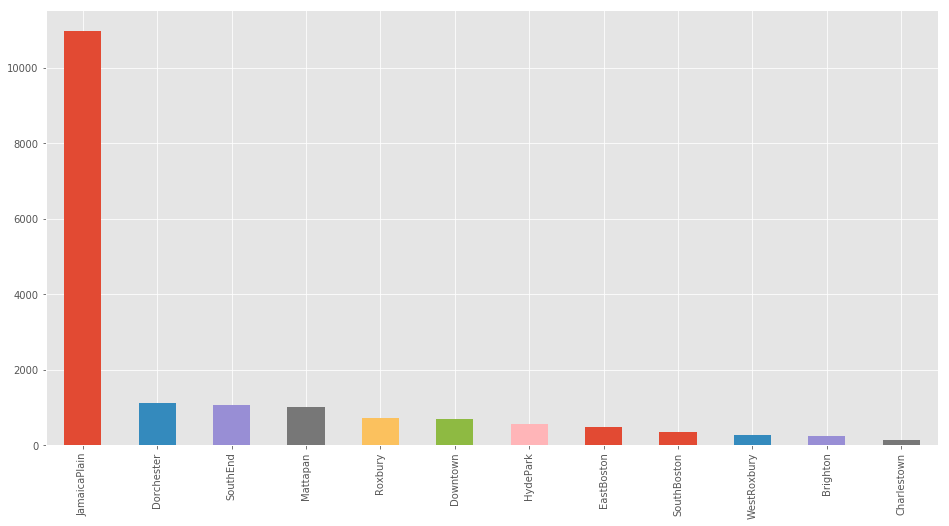

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
crash['district'].value_counts().plot.bar()
plt.show()

In [78]:
#  6-12am // 12-5pm // 5-10pm // 10-6am
timelist = crash.dispatch_ts.tolist()
hour = []
month = []
for time in timelist:
    date_time = time.split()
    hour.append(date_time[1].split(':')[0])
    month.append(date_time[0].split('-')[1])

period = []
for i in hour:
    if i > "06" and i <= "12":
        period.append("morning")
    elif i > "12" and i <= "17":
        period.append("afternoon")
    elif i > "17" and i <= "22":
        period.append("evening")
    else:
        period.append("night")
crash["period"] = period
crash["month"] = month

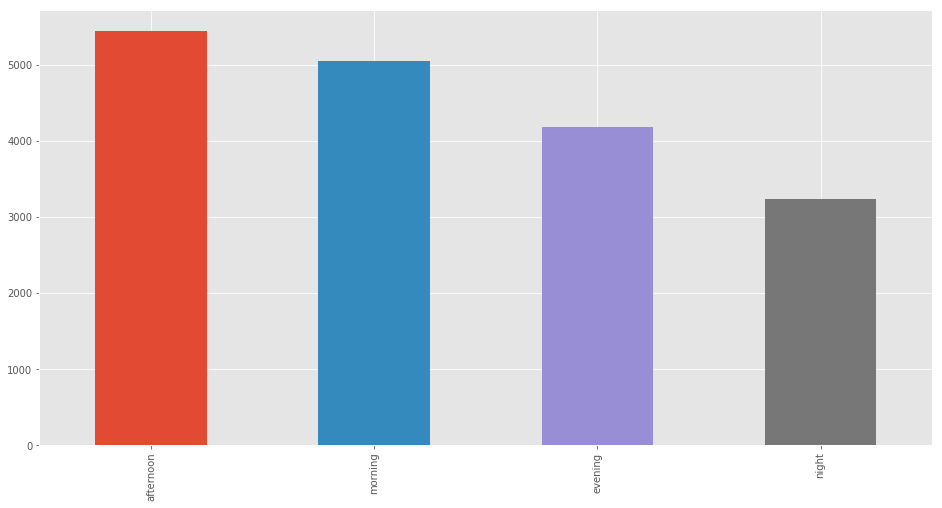

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(16,8))
crash['period'].value_counts().plot.bar()
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
crash['DISTRICT'].value_counts().plot.bar()
plt.show()

<Figure size 720x720 with 0 Axes>

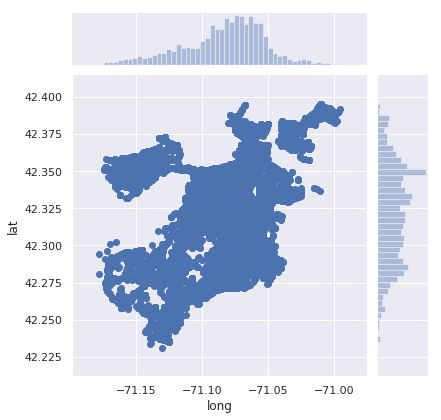

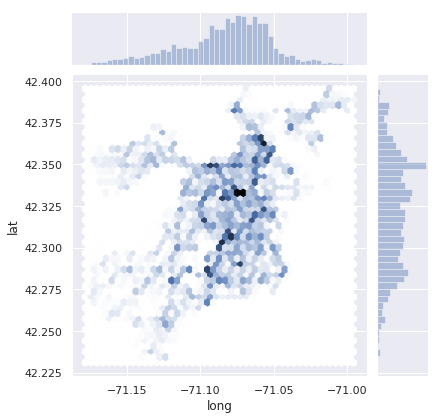

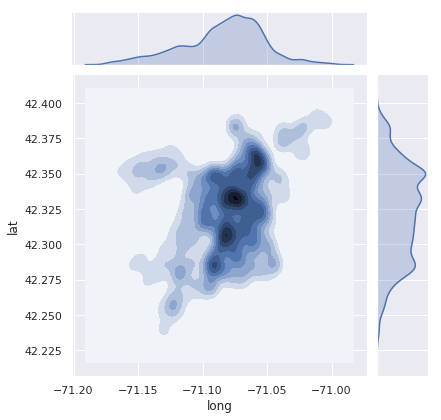

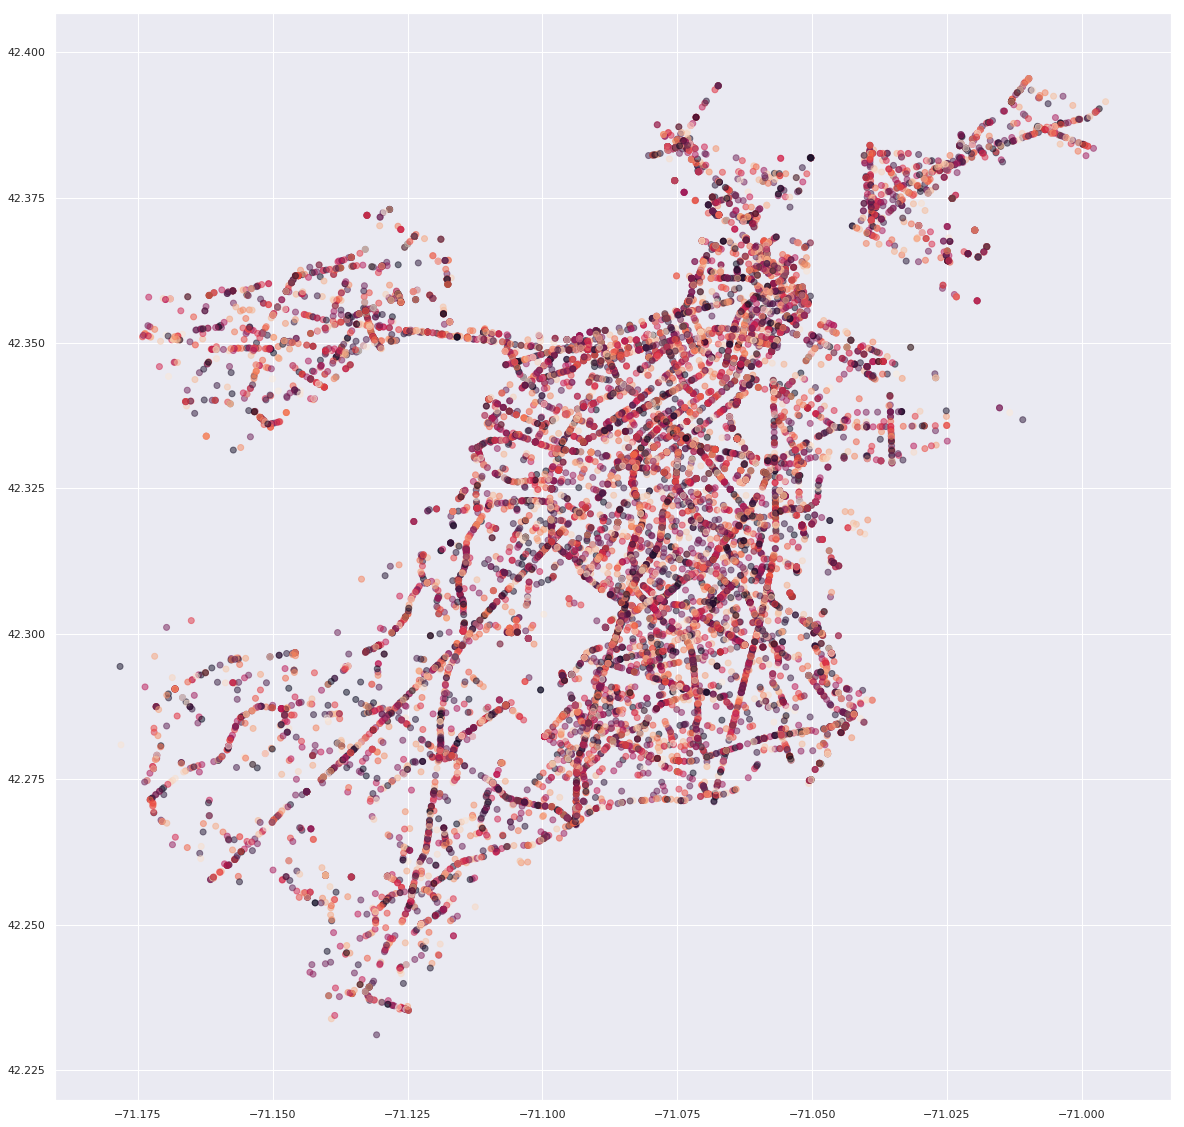

In [52]:

location = crash[['lat','long']]
location = location.dropna()

location = location.loc[(location['lat']>40) & (location['long'] < -60)]  

x_crash = location['long']
y_crash = location['lat']
plt.figure(figsize=(10, 10))
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x_crash, y_crash, kind='scatter')
sns.jointplot(x_crash, y_crash, kind='hex')
sns.jointplot(x_crash, y_crash, kind='kde')

x = location['long']
y = location['lat']

colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

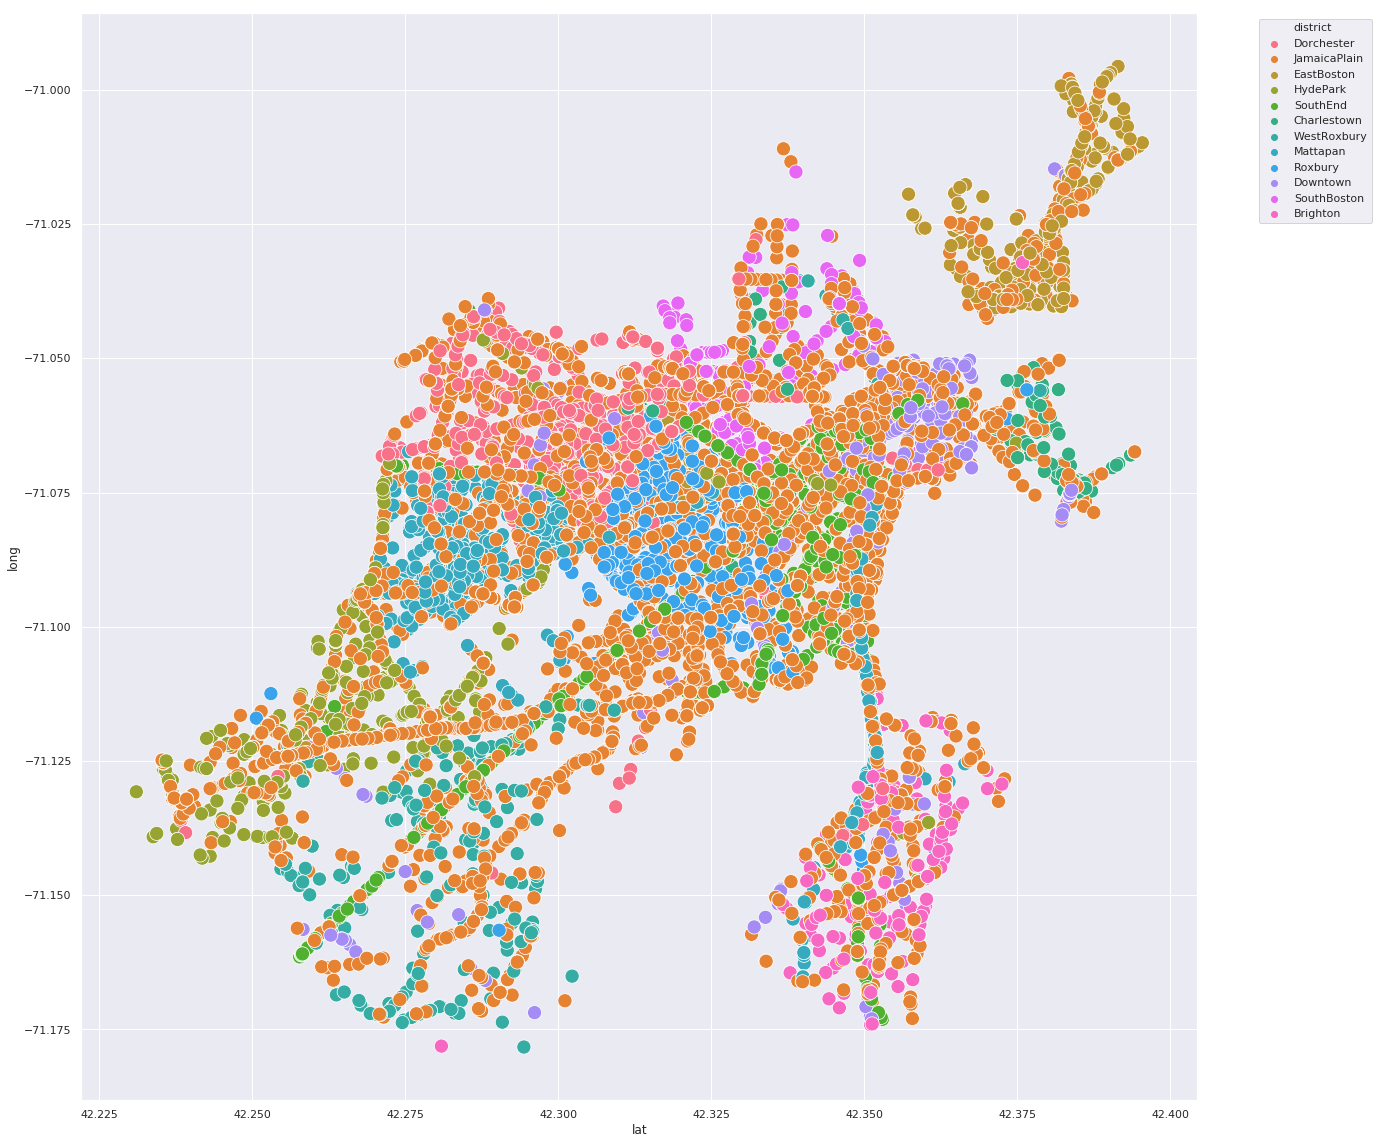

In [132]:
sns.scatterplot(x='lat',
               y='long',
                hue='district',
               data=crash, s=200)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [61]:
crash.mode_type.unique()

array(['ped', 'mv', 'bike'], dtype=object)

In [178]:
lati = crash.lat.tolist()
longt = crash.long.tolist()

In [180]:
np.min(lati)

42.2310429762091

In [181]:
eps = [(np.max(lati) - np.min(lati)) / 10, (np.max(longt) - np.min(longt)) / 10]
eps

[0.016442483518309813, 0.018267752487649603]

In [182]:
minla = np.min(lati)
maxla = np.max(lati)
minlo = np.min(longt)
maxlo = np.max(longt)
points = []
for i in range(11):
    points.append([minla + i * eps[0], minlo + i * eps[1]])
points


[[42.2310429762091, -71.1782836266954],
 [42.247485459727415, -71.16001587420776],
 [42.263927943245726, -71.1417481217201],
 [42.28037042676403, -71.12348036923245],
 [42.29681291028234, -71.10521261674481],
 [42.31325539380065, -71.08694486425716],
 [42.329697877318964, -71.0686771117695],
 [42.346140360837275, -71.05040935928186],
 [42.36258284435558, -71.03214160679421],
 [42.37902532787389, -71.01387385430655],
 [42.3954678113922, -70.99560610181891]]

In [184]:
print(maxla)
print(minla)
print(maxlo)
print(minlo)

42.3954678113922
42.2310429762091
-70.99560610181891
-71.1782836266954


In [185]:
result = 
for item in c:
    if item[0]

array([[ 42.31234975, -71.0466433 ],
       [ 42.35876912, -71.07231039],
       [ 42.36535072, -71.02111359],
       ...,
       [ 42.37333727, -71.03903959],
       [ 42.2570811 , -71.12011089],
       [ 42.2897499 , -71.05251533]])

In [139]:
crash.to_csv("newData", sep='\t', encoding='utf-8')

In [137]:
crash

,dispatch_ts,mode_type,location_type,street,xstreet1,xstreet2,x_cord,y_cord,lat,long,district,period,month
0,2019-02-28 16:22:25,ped,Street,OLD COLONY TER,SAVIN HILL AVE,WILLIAM T MORRISSEY BLVD,778755.72,2939231.02,42.312350,-71.046643,Dorchester,afternoon,02
1,2019-02-28 16:17:07,mv,Intersection,NaN,DAVID G MUGAR WAY,PINCKNEY ST,771761.61,2956054.41,42.358769,-71.072310,JamaicaPlain,afternoon,02
2,2019-02-28 15:51:51,ped,Street,TERMINAL RD,TERMINAL A,TERMINAL B,785398.37,2958235.76,42.365351,-71.021114,EastBoston,afternoon,02
3,2019-02-28 15:34:55,mv,Street,RADCLIFFE RD,GREENFIELD RD,RUSKINDALE RD,763248.44,2923046.31,42.268228,-71.104232,HydePark,afternoon,02
4,2019-02-28 14:44:53,ped,Intersection,NaN,BOYLSTON ST,MASSACHUSETTS AVE,767612.72,2951853.40,42.347298,-71.087736,JamaicaPlain,afternoon,02
5,2019-02-28 12:54:00,mv,Street,WEST ROXBURY PKWY,NEW PARK AVE,COLBERG AVE,752111.01,2928117.46,42.282235,-71.145630,None,morning,02
6,2019-02-28 12:23:54,mv,Street,WASHINGTON ST,COREY RD,EGREMONT RD,753064.51,2950070.06,42.342854,-71.141305,SouthEnd,morning,02
7,2019-02-28 10:57:33,ped,Intersection,NaN,E CONCORD ST,HARRISON AVE,771559.29,2947936.65,42.336497,-71.073209,JamaicaPlain,morning,02
8,2019-02-28 09:10:45,bike,Street,MAIN ST,WOOD ST,HATHON SQ,773676.65,2962462.43,42.376180,-71.065303,Charlestown,morning,02
9,2019-02-28 00:51:08,mv,Other,NaN,NaN,NaN,745397.73,2955465.39,42.357474,-71.169861,JamaicaPlain,night,02


In [158]:
c = np.array(location)
print(c.shape)

(17912, 2)


In [162]:
c = crash[['lat','long']]
c = np.array(loc)
print(loc.shape)

(17912, 2)


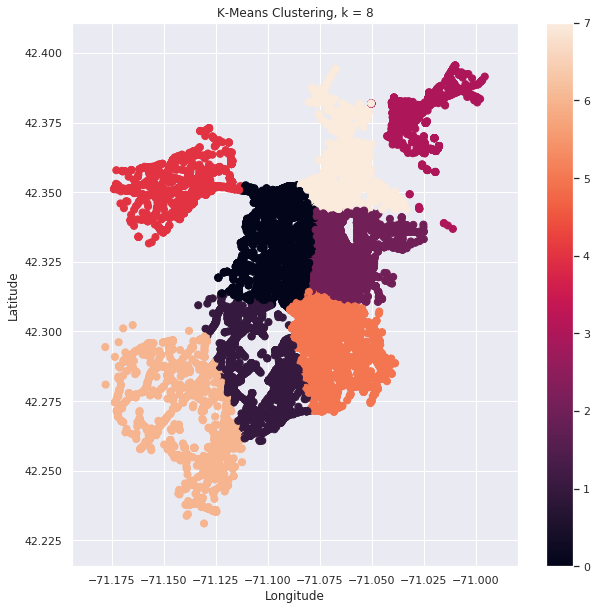

In [203]:
from sklearn.cluster import KMeans
X = location
X = X[~np.isnan(X)]
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, 8)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['long'],X['lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering, k = 8')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.colorbar(scatter)